In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHypnoDfParquet, regroupHypno, graphHypnoDate
import pandas as pd

whoopHypnoDF = getWorkingHypnoDfParquet("whoop")
whoopHypnoDF['startDate'] = whoopHypnoDF.index
whoopHypnoDF

,endDate,value,startDate
startDate,,,
2022-04-11 08:04:24+00:00,2022-04-11 08:09:14+00:00,1,2022-04-11 08:04:24+00:00
2022-04-11 08:09:14+00:00,2022-04-11 08:18:00+00:00,0,2022-04-11 08:09:14+00:00
2022-04-11 08:18:00+00:00,2022-04-11 08:19:57+00:00,1,2022-04-11 08:18:00+00:00
2022-04-11 08:19:57+00:00,2022-04-11 08:27:40+00:00,2,2022-04-11 08:19:57+00:00
2022-04-11 08:27:40+00:00,2022-04-11 08:33:57+00:00,1,2022-04-11 08:27:40+00:00
...,...,...,...
2024-05-10 13:17:31+00:00,2024-05-10 13:49:43+00:00,1,2024-05-10 13:17:31+00:00
2024-05-10 13:49:43+00:00,2024-05-10 14:10:52+00:00,2,2024-05-10 13:49:43+00:00
2024-05-10 14:10:52+00:00,2024-05-10 14:34:25+00:00,1,2024-05-10 14:10:52+00:00


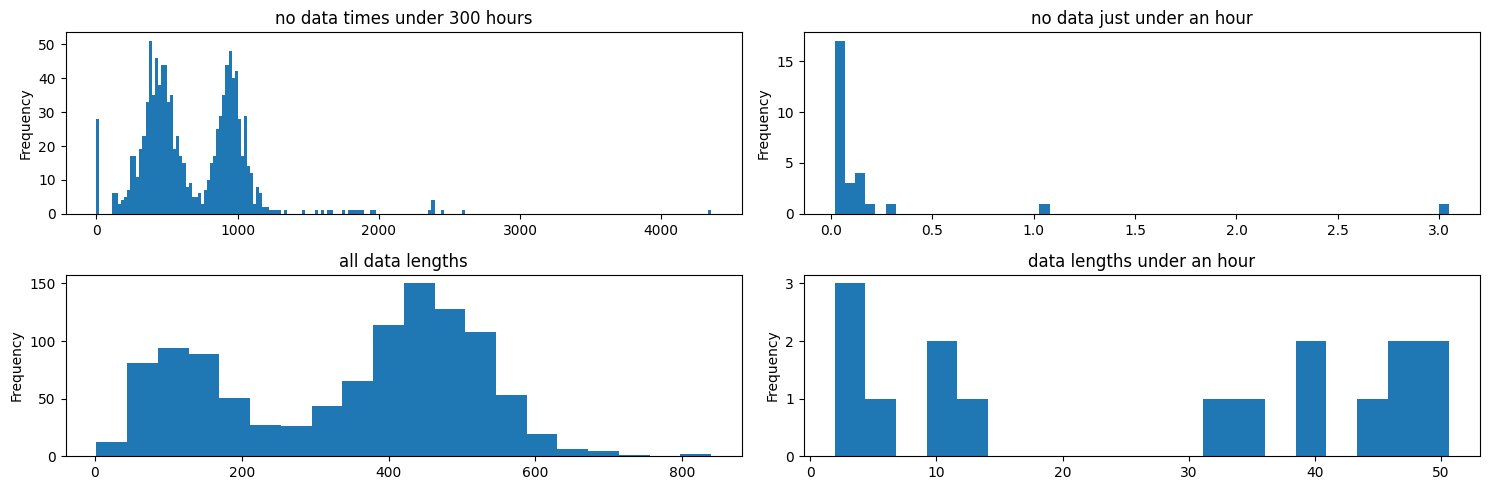

In [2]:
groupedByNoData = regroupHypno(whoopHypnoDF, [-1])
noDataTimes = groupedByNoData[groupedByNoData['value'] == 1]
dataTimes = groupedByNoData[groupedByNoData['value'] == 0]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

noDataTimes[noDataTimes['durationInMin'] < 18000].durationInMin.plot.hist(bins=200, ax=axs[0,0])
axs[0,0].set_title("no data times under 300 hours")

noDataTimes[noDataTimes['durationInMin'] < 60].durationInMin.plot.hist(bins=60, ax=axs[0,1])
axs[0,1].set_title('no data just under an hour')

dataTimes[dataTimes['durationInMin'] < 10000].durationInMin.plot.hist(bins=20, ax=axs[1,0])
axs[1,0].set_title('all data lengths')

dataTimes[dataTimes['durationInMin'] < 60].durationInMin.plot.hist(bins=20, ax=axs[1,1])
axs[1,1].set_title('data lengths under an hour')

plt.tight_layout()
plt.show()

In [3]:
groupedByAsleep = regroupHypno(whoopHypnoDF, [1,2,3])
awakeOrNoDataTimes = groupedByAsleep[groupedByAsleep['value'] == 0]
sleepTimes = groupedByAsleep[groupedByAsleep['value'] == 1]

<AxesSubplot:>

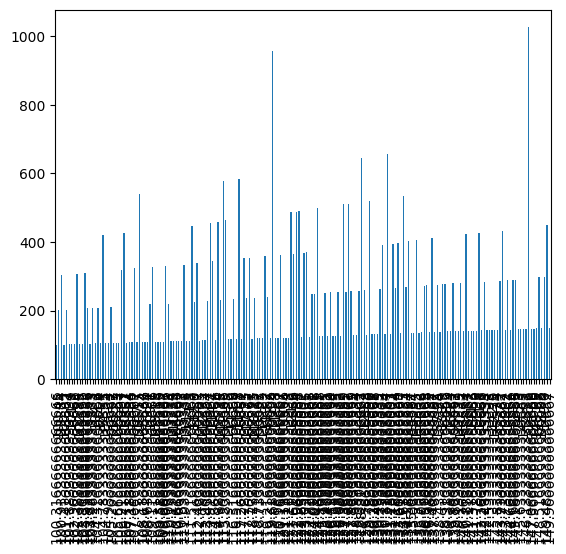

In [4]:
overallDurationList = (sleepTimes.durationInMin.value_counts().index *
                       sleepTimes.durationInMin.value_counts().values
                       ).to_list()
sleepTimesOverallDurations = pd.Series(index=sleepTimes.durationInMin.value_counts().index, 
                                       data=overallDurationList)

sleepTimesOverallDurations = sleepTimesOverallDurations.sort_index()

sleepTimesOverallDurations[(100 < sleepTimesOverallDurations.index) &
                           (sleepTimesOverallDurations.index < 150)].plot.bar()

<AxesSubplot:>

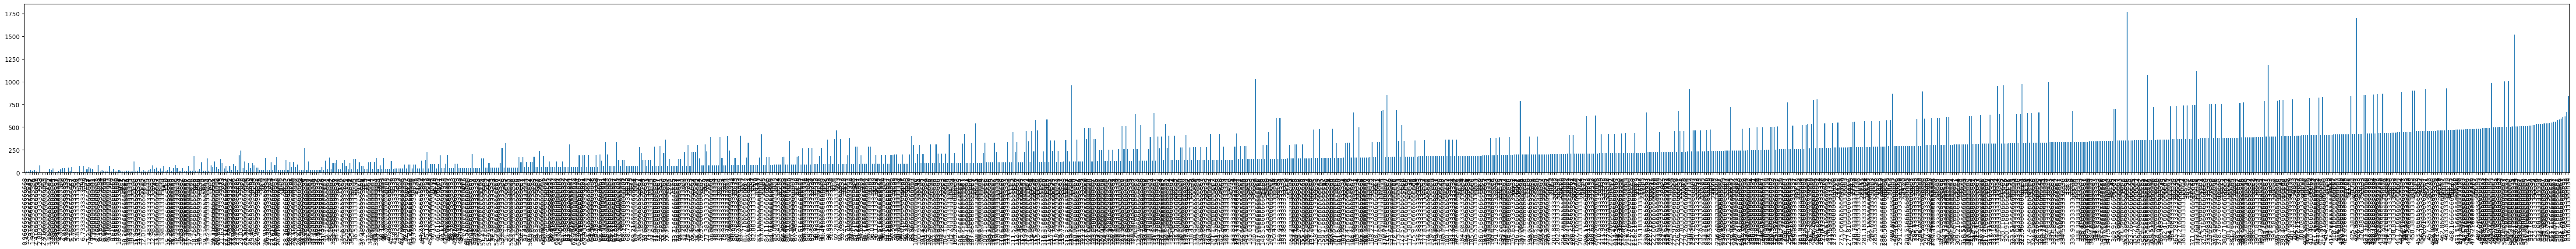

In [5]:
sleepTimesOverallDurations.plot.bar(figsize=(75, 5))

<AxesSubplot:ylabel='Frequency'>

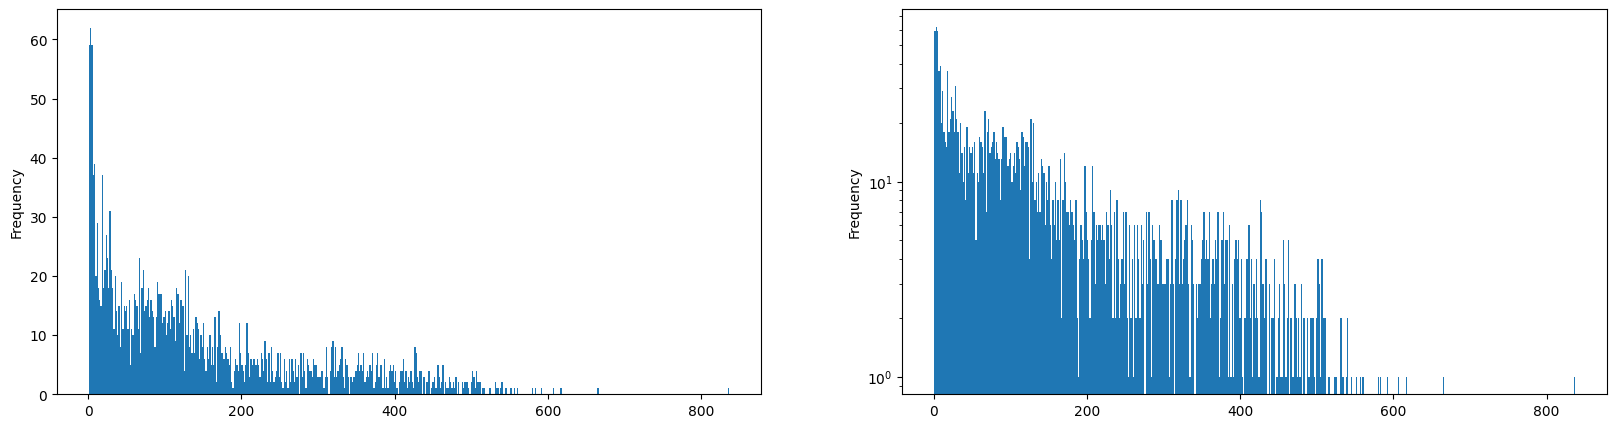

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sleepTimes.durationInMin.plot.hist(bins=500, ax=axs[0])
sleepTimes.durationInMin.plot.hist(bins=500, log=True, ax=axs[1])

<AxesSubplot:ylabel='Frequency'>

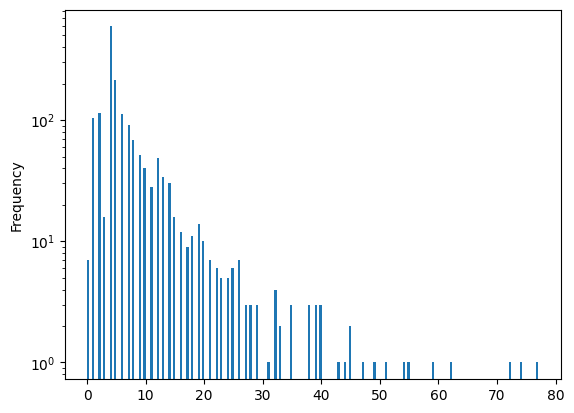

In [7]:
labeledAwakePeriods = whoopHypnoDF[whoopHypnoDF['value'] == 0]
labeledAwakeDuration = (labeledAwakePeriods['endDate'] - labeledAwakePeriods['startDate']).astype('timedelta64[m]')
labeledAwakeDuration[labeledAwakeDuration<1000].plot.hist(bins=200,log=True)

In [8]:
len(set(whoopHypnoDF.index.date))

751

In [9]:
print(sorted(list(set(whoopHypnoDF.index.date)))[0])
print(sorted(list(set(whoopHypnoDF.index.date)))[-1])

2022-04-11
2024-05-10


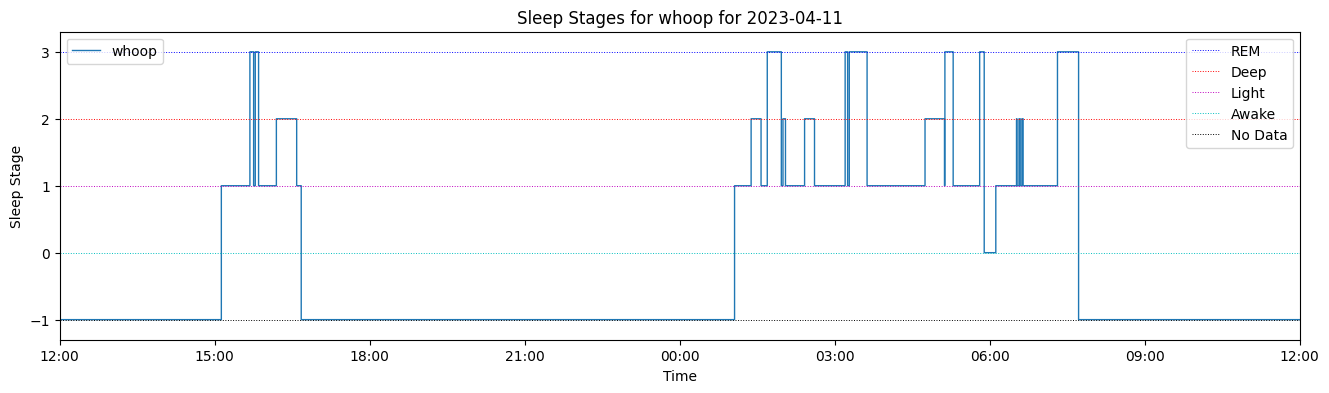

In [10]:
from datetime import date
graphHypnoDate(whoopHypnoDF, date(2023,4,11), 'whoop')

In [11]:

from datetime import timedelta, time, date, datetime
import pytz
cutOffTime = time(12,0,0)
timezone = 'US/Arizona'
forDate = date(2023,4,11)
hypnoDf = whoopHypnoDF

graphTimeStart = pytz.timezone(timezone).localize(datetime.combine(forDate - timedelta(days=1), cutOffTime))
graphTimeEnd = graphTimeStart + timedelta(days=1)
hypnoDfForDay = hypnoDf[(hypnoDf['startDate'] < graphTimeEnd) &
                            (hypnoDf['endDate'] > graphTimeStart)]
hypnoDfForDay

,endDate,value,startDate,isInTypes,isNewGroup,ConsecutiveGroup
startDate,,,,,,
2023-04-10 15:35:51+00:00,2023-04-10 22:07:37+00:00,-1,2023-04-10 15:35:51+00:00,0,1,2464
2023-04-10 22:07:37+00:00,2023-04-10 22:40:47+00:00,1,2023-04-10 22:07:37+00:00,1,1,2465
2023-04-10 22:40:47+00:00,2023-04-10 22:45:06+00:00,3,2023-04-10 22:40:47+00:00,1,0,2465
2023-04-10 22:45:06+00:00,2023-04-10 22:47:02+00:00,1,2023-04-10 22:45:06+00:00,1,0,2465
2023-04-10 22:47:02+00:00,2023-04-10 22:50:52+00:00,3,2023-04-10 22:47:02+00:00,1,0,2465
2023-04-10 22:50:52+00:00,2023-04-10 23:11:32+00:00,1,2023-04-10 22:50:52+00:00,1,0,2465
2023-04-10 23:11:32+00:00,2023-04-10 23:35:06+00:00,2,2023-04-10 23:11:32+00:00,1,0,2465
2023-04-10 23:35:06+00:00,2023-04-10 23:40:23+00:00,1,2023-04-10 23:35:06+00:00,1,0,2465
2023-04-10 23:40:23+00:00,2023-04-11 08:03:37+00:00,-1,2023-04-10 23:40:23+00:00,0,1,2466
